In [11]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

current_dir = os.getcwd()
sys.path.append(current_dir)
sys.path.append(current_dir + '/../')
print(current_dir)
data_folder = os.path.join(current_dir, '../Data')

from utils import *

/Users/zhaoyiming/Desktop/ETHZurich/1. Y1S1/2. AML/Project/task-2-ECG-Signals-Classification/FeaturePreprocessing


In [12]:
y_pred = np.zeros((3411))
# test submission functionality
submit_pred(y_pred, 'test_submission.csv')

In [13]:
X_train_features = pd.read_csv(os.path.join(data_folder, 'features/X_train_features.csv'), index_col=0)
X_test_features = pd.read_csv(os.path.join(data_folder, 'features/X_test_features.csv'), index_col=0)
y_train = pd.read_csv(os.path.join(data_folder, 'Input/y_train.csv'), index_col=0)

In [14]:
X_train_features.shape, X_test_features.shape, y_train.shape

((5117, 2239), (3411, 2239), (5117, 1))

In [15]:
y_train.value_counts()

y
0    3030
2    1474
1     443
3     170
Name: count, dtype: int64

In [4]:
# impute missing values
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

imputer = SimpleImputer(strategy='mean')
X_train_features = pd.DataFrame(imputer.fit_transform(X_train_features), columns=X_train_features.columns)
X_test_features = pd.DataFrame(imputer.transform(X_test_features), columns=X_test_features.columns)

# scale the data
scaler = StandardScaler()
X_train_features = pd.DataFrame(scaler.fit_transform(X_train_features), columns=X_train_features.columns)
X_test_features = pd.DataFrame(scaler.transform(X_test_features), columns=X_test_features.columns)

# describe the data
X_train_features.describe()


,ts_mean,ts_median,ts_std,ts_var,ts_max,ts_rms,ts_peak_to_peak,ts_skewness,ts_kurtosis,ts_sma,...,psd_heart_rate_db4_coeff_3_skewness,psd_heart_rate_db4_coeff_3_kurtosis,psd_heart_rate_db4_coeff_3_zero_crossing_rate,psd_heart_rate_db4_coeff_3_sma,psd_heart_rate_db4_coeff_3_energy,psd_heart_rate_db4_coeff_3_entropy,psd_heart_rate_db4_coeff_3_crest_factor,psd_heart_rate_db4_coeff_3_impulse_factor,psd_heart_rate_db4_coeff_3_shape_factor,psd_heart_rate_db4_coeff_3_clearance_factor
count,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,...,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03,5.117000e+03
mean,2.520295e-16,2.617497e-16,-1.156003e-16,1.645482e-16,2.055117e-16,2.693869e-16,2.055117e-16,1.041444e-18,-1.514474e-09,3.679770e-17,...,1.666311e-17,5.884160e-17,-2.204390e-16,-4.165777e-18,1.562166e-18,-4.512925e-18,-4.939917e-16,1.041444e-18,2.082889e-17,-4.939917e-16
std,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,...,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00,1.000098e+00
min,-2.133626e+00,-2.133626e+00,-2.133626e+00,-1.216706e+00,-2.133626e+00,-2.133626e+00,-2.133626e+00,-3.500071e+00,-7.964044e+00,-1.216665e+00,...,-3.805196e+00,-1.559976e+00,-2.417234e+00,-3.833278e-01,-1.160152e-01,-3.312495e+01,-3.638074e+00,-1.649858e+01,-2.183682e+00,-3.638074e+00
25%,-2.934897e-01,-2.934897e-01,-2.934897e-01,-3.579756e-01,-2.934897e-01,-2.934897e-01,-2.934897e-01,-6.066562e-01,1.362294e-01,-3.579781e-01,...,-7.384364e-01,-6.967748e-01,-7.846927e-01,-3.707572e-01,-1.159993e-01,0.000000e+00,-7.532183e-01,-3.167447e-03,-6.921527e-01,-7.532183e-01
50%,-2.205841e-01,-2.205841e-01,-2.205841e-01,-3.049977e-01,-2.205841e-01,-2.205841e-01,-2.205841e-01,4.478789e-02,1.794341e-01,-3.050011e-01,...,-1.350924e-02,-2.042879e-01,-1.316761e-01,-3.246158e-01,-1.156479e-01,0.000000e+00,7.655164e-02,-3.167447e-03,-1.037949e-01,7.655164e-02
75%,-1.330975e-01,-1.330975e-01,-1.330975e-01,-2.395171e-01,-1.330975e-01,-1.330975e-01,-1.330975e-01,6.387932e-01,2.268867e-01,-2.395216e-01,...,7.307191e-01,5.048874e-01,5.213404e-01,-6.262813e-02,-1.061804e-01,0.000000e+00,7.309979e-01,-3.167447e-03,5.381504e-01,7.309979e-01
max,2.839505e+00,2.839505e+00,2.839505e+00,3.221648e+00,2.839505e+00,2.839505e+00,2.839505e+00,4.244679e+00,7.801252e-01,3.221662e+00,...,4.660571e+00,8.075952e+00,7.704523e+00,1.779191e+01,3.208528e+01,4.387336e+01,4.077910e+00,4.152573e+01,6.382259e+00,4.077910e+00


<Axes: xlabel='y'>

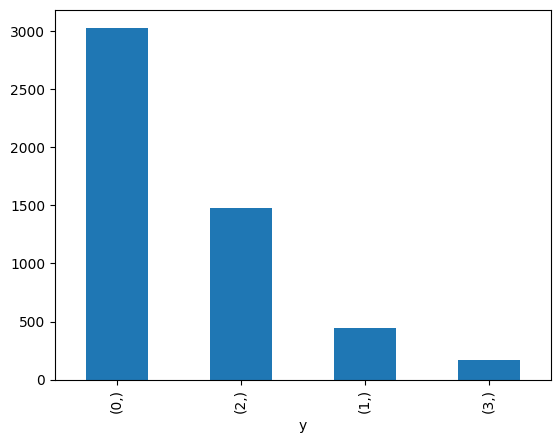

In [5]:
# show imbalance in the data
y_train.value_counts().plot(kind='bar')

In [13]:
# train without balancing
# use lightgbm

import lightgbm as lgb
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score

# split while keep the imbalance ratio
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_features,
    y_train.values.ravel(),
    test_size=0.2,
    stratify=y_train,
    random_state=42,
)

# it is multi-class classification
# use multi_logloss as objective

lgb_params = {
    'objective': 'multiclass',
    'num_class': 4,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'max_depth': 7,
    'n_estimators': 1000,
    'n_jobs': -1,
    'seed': 42,
    'early_stopping_rounds': 100,
}

lgbm = lgb.LGBMClassifier(**lgb_params)

lgbm.fit(X_tr, y_tr, eval_set=[(X_val, y_val)])

y_pred = lgbm.predict(X_val)
f1_score(y_val, y_pred, average='weighted')


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[92]	valid_0's multi_logloss: 0.5033


0.7932147769498995

In [ ]:
# train on whole data
# remove early stopping
del lgb_params['early_stopping_rounds']
lgbm = lgb.LGBMClassifier(**lgb_params)
lgbm.fit(X_train_features, y_train.values.ravel())

y_pred = lgbm.predict(X_test_features)
submit_pred(y_pred, 'noblance_lgbm.csv')